## Background

For more Definitions of key data points, see https://taylor.wjakethompson.com/reference/taylor_songs

**Dancibility:** How suitable a track is for dancing. 0.0 = least danceable, 1.0 = most danceable (based on spotify API)

**Valence:**Musical positiveness conveyed by the track. 0.0 = low valence (e.g., sad, depressed, angry), 1.0 = high valence (e.g., happy, cheerful, euphoric).


## Load required libraries

In [8]:
import pandas as pd
import matplotlib.font_manager as fm
from plotnine import *

In [31]:
## specify a font path (see https://t-redactyl.io/blog/2020/09/making-beautiful-boxplots-using-plotnine-in-python.html)
barlow_regular_property = fm.FontProperties(fname = "/Users/stepheaneff/Library/fonts/Barlow-Regular.ttf")
barlow_bold_property = fm.FontProperties(fname = "/Users/stepheaneff/Library/fonts/Barlow-SemiBold.ttf")

## Read in data

In [15]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-10-17/taylor_album_songs.csv"
taylor_album_songs = pd.read_csv(url, index_col = 0)

In [16]:
taylor_album_songs.head(5)

,ep,album_release,track_number,track_name,artist,featuring,bonus_track,promotional_release,single_release,track_release,...,liveness,valence,tempo,time_signature,duration_ms,explicit,key_name,mode_name,key_mode,lyrics
album_name,,,,,,,,,,,,,,,,,,,,,
Taylor Swift,False,2006-10-24,1,Tim McGraw,Taylor Swift,NaN,False,NaN,2006-06-19,2006-06-19,...,0.1210,0.425,76.009,4.0,232107.0,False,C,major,C major,NaN
Taylor Swift,False,2006-10-24,2,Picture To Burn,Taylor Swift,NaN,False,NaN,2008-02-03,2006-10-24,...,0.0962,0.821,105.586,4.0,173067.0,False,G,major,G major,NaN
Taylor Swift,False,2006-10-24,3,Teardrops On My Guitar,Taylor Swift,NaN,False,NaN,2007-02-19,2006-10-24,...,0.1190,0.289,99.953,4.0,203040.0,False,A#,major,A# major,NaN
Taylor Swift,False,2006-10-24,4,A Place In This World,Taylor Swift,NaN,False,NaN,NaN,2006-10-24,...,0.3200,0.428,115.028,4.0,199200.0,False,A,major,A major,NaN
Taylor Swift,False,2006-10-24,5,Cold As You,Taylor Swift,NaN,False,NaN,NaN,2006-10-24,...,0.1230,0.261,175.558,4.0,239013.0,False,F,major,F major,NaN


## Reformat data

I only want to label some songs. Create a few field called "label" and just keep non-empty labels for the values specified in songs_to_keep, below.

In [17]:
taylor_album_songs['label'] = taylor_album_songs.loc[:, 'track_name']

In [18]:
songs_to_keep = ["Shake It Off", "Stay Stay Stay", "Paper Rings", "Hey Stephen (Taylor's Version)",
             "You Need to Calm Down", "How You Get the Girl", "Gorgeous", "I Think He Knows",
             "Cornelia Street", "Clean", "Vigilante Shit", "Delicate", "Maroon", "closure",
             "This Love (Taylor's Version)", "epiphany", "The Archer", "the lakes", "Bigger Than The Whole Sky",
             "willow", "Better Than Revenge", "Mean", "Sweet Nothing", "How You Get The Girl"]
taylor_album_songs.loc[~taylor_album_songs.track_name.isin(songs_to_keep), "label"] = ''

Exclude rows with missing danceability or valence data, since we can't plot them.

In [19]:
taylor_album_songs.dropna(subset = ['danceability', 'valence'], inplace=True)

## Deal with fonts
See https://t-redactyl.io/blog/2020/09/making-beautiful-boxplots-using-plotnine-in-python.htmlCreate


In [65]:
# Create font objects
title_text = barlow_bold_property 
body_text = barlow_regular_property
caption_text = barlow_regular_property

# Alter size and weight of font objects
title_text.set_size(18)
body_text.set_size(18)
caption_text.set_size(12)

## Create figure

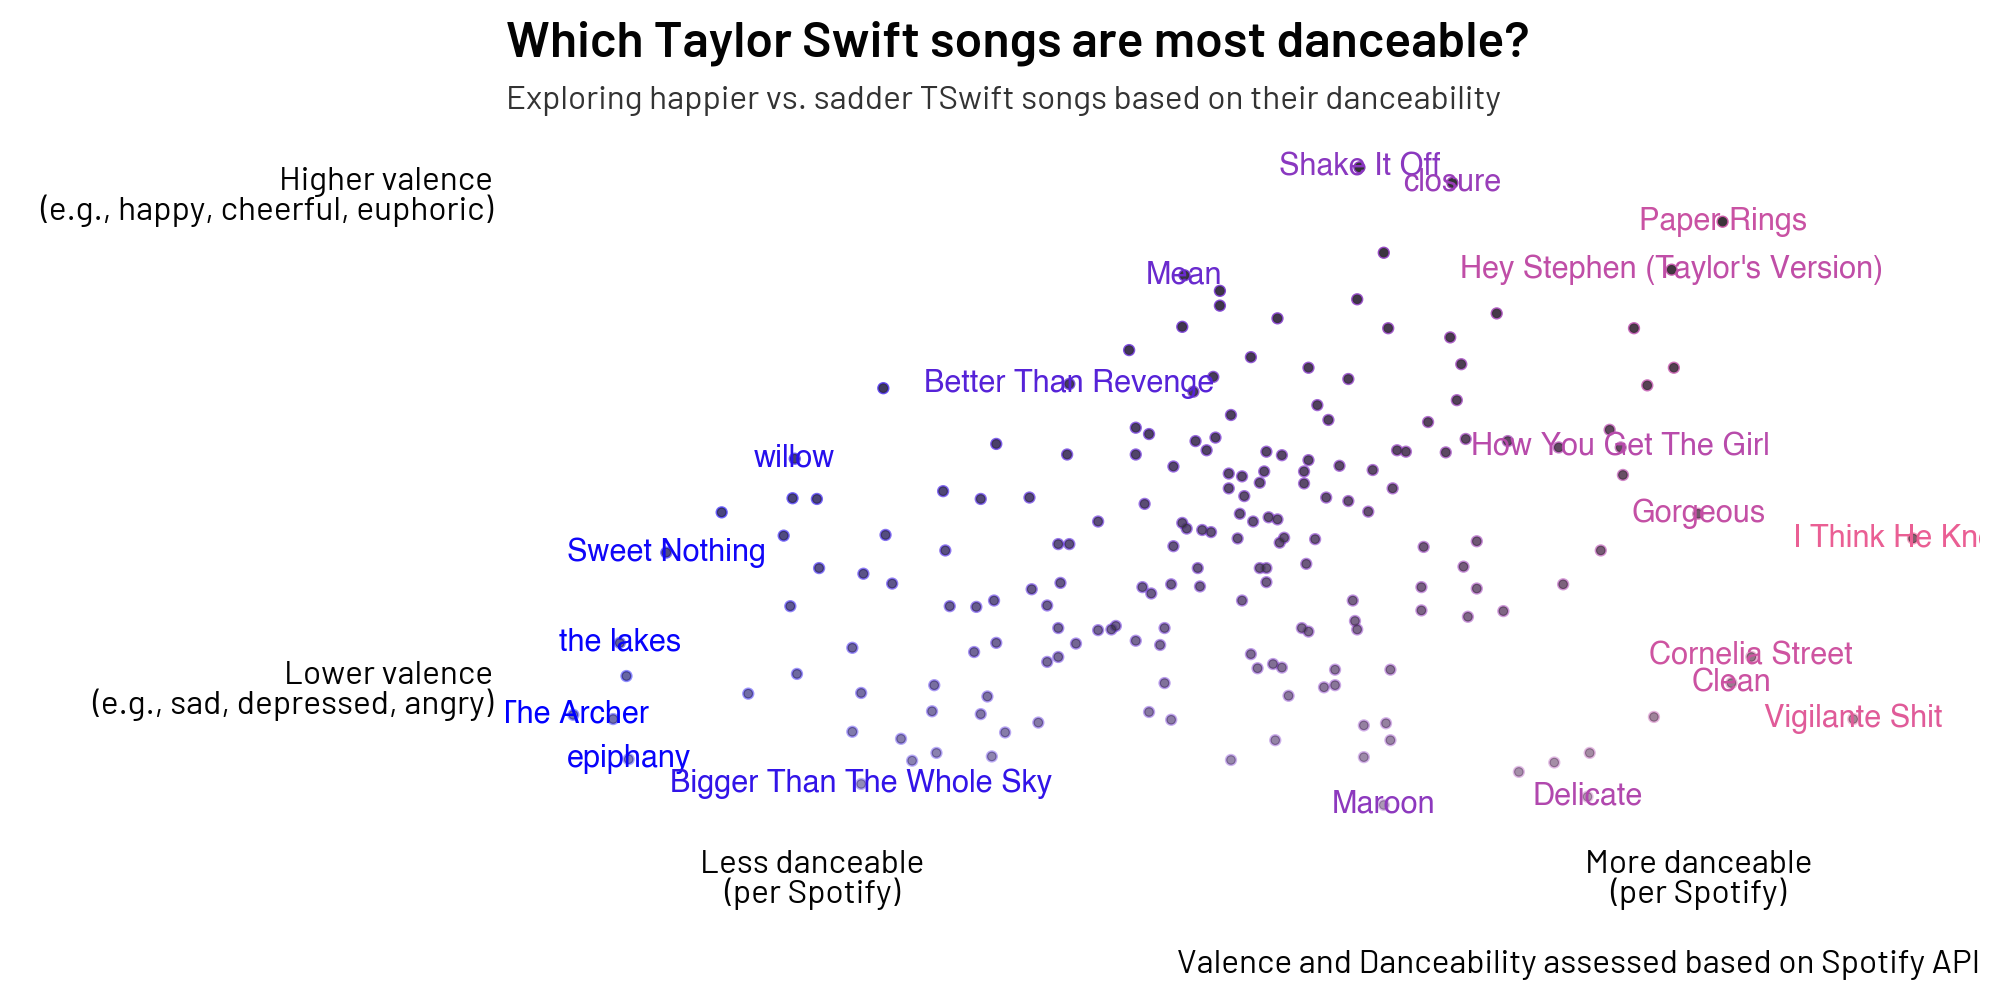

<Figure Size: (1000 x 500)>

In [83]:
(
ggplot(taylor_album_songs, aes(x = 'danceability', y = 'valence', label = 'label',
                              alpha = "valence", color = "danceability")) + 
  geom_point() +
  geom_point(stroke = 0.2, color = "#333333") +
  geom_text(alpha = 1) + 
  labs(x = "", 
       y = "",
       title = "Which Taylor Swift songs are most danceable?",
       subtitle = "Exploring happier vs. sadder TSwift songs based on their danceability",
       caption = "Valence and Danceability assessed based on Spotify API") +
      theme_minimal() +
      theme(legend_position = 'none',
            text = element_text(colour = "#333333", fontproperties = body_text),
            panel_grid_major_x = element_blank(),
            panel_grid_minor_x = element_blank(),
            panel_grid_major_y = element_blank(),
            panel_grid_minor_y = element_blank(),
            strip_text = element_text(color = "#030303"),
            plot_title = element_text(colour = "#030303",
                                      fontproperties = title_text),        
            plot_caption = element_text(colour = "#030303",
                                       fontproperties = caption_text),
            axis_title = element_text(colour = "#030303", fontproperties = body_text),
            axis_text_x = element_text(colour = "#030303", fontproperties = body_text),
            axis_text_y = element_text(colour = "#030303", fontproperties = body_text),
           figure_size = [10, 5]) +
      scale_x_continuous(breaks = [0.4, .8],
                     labels = ["Less danceable\n(per Spotify)", 
                               "More danceable\n(per Spotify)"]) +
      scale_y_continuous(breaks = [0.2, .9],
                     labels = ["Lower valence\n(e.g., sad, depressed, angry)", 
                               "Higher valence\n(e.g., happy, cheerful, euphoric)"]) +
      scale_alpha(range = [0.3, 1]) +
      scale_color_gradient(low = "#0000FF", high = "#EA5F94") 
)